In [199]:
#essential libraries
import pandas as pd                   #pandas does things with matrixes
import pandas_datareader as pdr
import numpy as np                    #used for sorting a matrix
import matplotlib.pyplot as plt       #matplotlib is used for plotting data
import matplotlib.ticker as ticker    #used for changing tick spacing
import datetime as dt                 #used for dates
import matplotlib.dates as mdates     #used for dates, in a different way
import math
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime

In [200]:
pwd

'C:\\Users\\Mahima Gonuguntla'

In [201]:
#importing dataset
df = pd.read_csv(r"C:\\Users\\Mahima Gonuguntla\Desktop\Sem 5\Data Analytics\Project\all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### DATA PREPROCESSING 

Understanding our dataset
The first step towards data analysis is to understand the data in hand. Its columns, max, min, count, null values, etc...

In [202]:
df.columns                     #prints just the columns of the matrix

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [203]:
df.info()                            #get information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [204]:
df.describe()                        #describe the dataset

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


Missing values
In this section we will handle all the missing data in the dataset

In [205]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data                                                                         #this displays the matrix

,Total,Percent
date,0,0.000000
close,0,0.000000
volume,0,0.000000
Name,0,0.000000
high,8,0.001292
low,8,0.001292
open,11,0.001777


We observe that the total number of column with missing values is 8-27 
which is less that 0.005% of the dataset. It is convinient and a norm to get rid of the rows with missing value since the affect on the dataset will be very insignificant.

In [206]:
df = df.drop(df.loc[df['high'].isnull()].index)                         #drops rows with a null cell in the high column

Let's check the missing data again

In [207]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data

,Total,Percent
date,0,0.000000
high,0,0.000000
low,0,0.000000
close,0,0.000000
volume,0,0.000000
Name,0,0.000000
open,3,0.000485


We observe that the total number of missing rows to be 11, making the total number of rows being deleted less than 0.002% of the dataset.

In [208]:
df = df.drop(df.loc[df['open'].isnull()].index)                                   #drops rows with a null cell in the open column
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data  

,Total,Percent
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
Name,0,0.0


In [209]:
#we have successfully cleared all missing data from our dataset

In [210]:
df["Name"].unique()   #Display the abrievations of all 500 companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [269]:
Fox = df.loc[df['Name'] =='FOX']  #get the Fox stocks 
Fox.head()                         #display the Fox stocks 

,date,open,high,low,close,volume,Name
236145,2013-06-19,28.35,28.83,28.10,28.48,1501427,FOX
236146,2013-06-20,28.12,28.39,27.49,27.67,1623162,FOX
236147,2013-06-21,27.83,27.97,27.44,27.81,1143996,FOX
236148,2013-06-24,27.35,27.81,27.19,27.60,1173500,FOX
236149,2013-06-25,27.85,28.07,27.71,27.85,215906,FOX


In [270]:
Fox.info()   #Dispaly Fox stocks summary 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 236145 to 237313
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1169 non-null   object 
 1   open    1169 non-null   float64
 2   high    1169 non-null   float64
 3   low     1169 non-null   float64
 4   close   1169 non-null   float64
 5   volume  1169 non-null   int64  
 6   Name    1169 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.1+ KB


In [271]:
Fox_df = Fox.copy()  #Store the Fox stock value in a temporary variable 

In [272]:
Fox_df.loc[:, 'date'] = pd.to_datetime(Fox.loc[:,'date'], format="%Y/%m/%d")  #convert date from string to date format

In [273]:
Fox_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 236145 to 237313
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1169 non-null   datetime64[ns]
 1   open    1169 non-null   float64       
 2   high    1169 non-null   float64       
 3   low     1169 non-null   float64       
 4   close   1169 non-null   float64       
 5   volume  1169 non-null   int64         
 6   Name    1169 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 73.1+ KB


### DATA VISUALISATION 

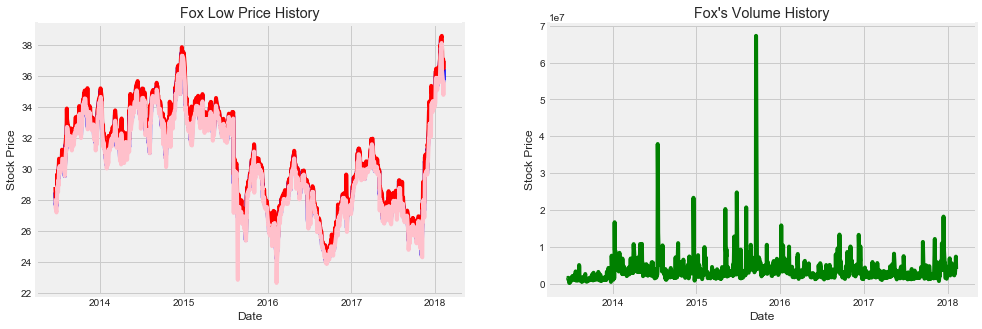

In [274]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(Fox_df["date"], Fox_df["close"], color="blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Fox Close Price History")


ax1.plot(Fox_df["date"], Fox_df["high"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Fox High Price History")


ax1.plot(Fox_df["date"], Fox_df["low"], color="pink")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Fox Low Price History")


ax2.plot(Fox_df["date"], Fox_df["volume"], color="green")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Fox's Volume History")

plt.show()

Text(0.5, 1.0, 'Fox Close Price History')

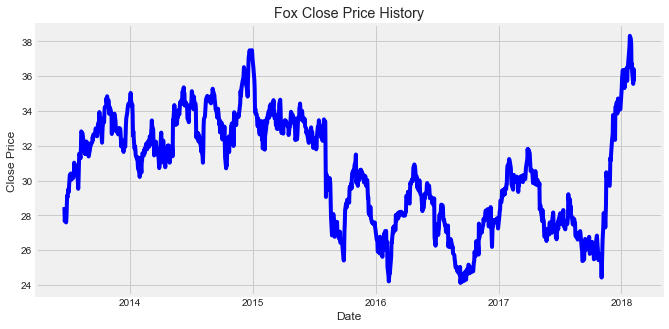

In [275]:

f, (ax1) = plt.subplots(1, figsize=(10,5))
ax1.plot(Fox_df["date"], Fox_df["close"], color="blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price ")
ax1.set_title("Fox Close Price History")

### DATA NORMALIZATION 

In [276]:
Fox_df

,date,open,high,low,close,volume,Name
236145,2013-06-19,28.35,28.83,28.10,28.48,1501427,FOX
236146,2013-06-20,28.12,28.39,27.49,27.67,1623162,FOX
236147,2013-06-21,27.83,27.97,27.44,27.81,1143996,FOX
236148,2013-06-24,27.35,27.81,27.19,27.60,1173500,FOX
236149,2013-06-25,27.85,28.07,27.71,27.85,215906,FOX
...,...,...,...,...,...,...,...
237309,2018-02-01,36.49,37.15,36.25,36.71,2743634,FOX
237310,2018-02-02,36.40,36.93,36.09,36.22,2921141,FOX
237311,2018-02-05,36.06,37.05,35.55,35.56,5306923,FOX
237312,2018-02-06,35.01,36.44,34.76,36.42,7349643,FOX


In [277]:
Fox_df1=Fox_df.reset_index()['close']  #gets the closing values of the Fox stock 

Fox_df1

0       28.48
1       27.67
2       27.81
3       27.60
4       27.85
        ...  
1164    36.71
1165    36.22
1166    35.56
1167    36.42
1168    35.70
Name: close, Length: 1169, dtype: float64

In [278]:
from sklearn.preprocessing import MinMaxScaler         #Normalises the closing values and scales them btw 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
Fox_df1=scaler.fit_transform(np.array(Fox_df1).reshape(-1,1))

In [279]:
print(Fox_df1)

[[0.30704225]
 [0.25      ]
 [0.25985915]
 ...
 [0.8056338 ]
 [0.86619718]
 [0.81549296]]


### SPLITTING THE DATA INTO TRAIN AND TEST 

In [280]:
training_size=int(len(Fox_df1)*0.70)
test_size=len(Fox_df1)-training_size
train_data,test_data=Fox_df1[0:training_size,:],Fox_df1[training_size:len(Fox_df1),:1]

In [281]:
training_size,test_size

(818, 351)

In [282]:
train_data

array([[0.30704225],
       [0.25      ],
       [0.25985915],
       [0.24507042],
       [0.26267606],
       [0.31267606],
       [0.3528169 ],
       [0.34507042],
       [0.38098592],
       [0.36760563],
       [0.39647887],
       [0.43661972],
       [0.44295775],
       [0.42816901],
       [0.41830986],
       [0.41971831],
       [0.43450704],
       [0.42464789],
       [0.43591549],
       [0.43591549],
       [0.48661972],
       [0.46830986],
       [0.47605634],
       [0.47323944],
       [0.44753521],
       [0.44577465],
       [0.44788732],
       [0.41338028],
       [0.38098592],
       [0.41338028],
       [0.46126761],
       [0.52253521],
       [0.51197183],
       [0.50492958],
       [0.54225352],
       [0.61338028],
       [0.61126761],
       [0.60492958],
       [0.59295775],
       [0.57957746],
       [0.55105634],
       [0.55915493],
       [0.52253521],
       [0.55422535],
       [0.52253521],
       [0.56549296],
       [0.57253521],
       [0.567

In [283]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [284]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [285]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [286]:
print(X_test.shape), print(y_test.shape)

(250, 100)
(250,)


(None, None)

In [287]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### THE LSTM MODEL 

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [289]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [290]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [291]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 717 samples, validate on 250 samples
Epoch 1/100
717/717 [==============================] - 5s 6ms/sample - loss: 0.0895 - val_loss: 0.0163
Epoch 2/100
717/717 [==============================] - 2s 2ms/sample - loss: 0.0181 - val_loss: 0.0165
Epoch 3/100
717/717 [==============================] - 2s 2ms/sample - loss: 0.0114 - val_loss: 0.0132
Epoch 4/100
717/717 [==============================] - 2s 3ms/sample - loss: 0.0088 - val_loss: 0.0106
Epoch 5/100
717/717 [==============================] - 2s 2ms/sample - loss: 0.0074 - val_loss: 0.0090
Epoch 6/100
717/717 [==============================] - 2s 2ms/sample - loss: 0.0067 - val_loss: 0.0080
Epoch 7/100
717/717 [==============================] - 2s 3ms/sample - loss: 0.0065 - val_loss: 0.0076
Epoch 8/100
717/717 [==============================] - 2s 3ms/sample - loss: 0.0063 - val_loss: 0.0073
Epoch 9/100
717/717 [==============================] - 2s 3ms/sample - loss: 0.0060 - val_loss: 0.0067
Epoch 10/100
717/717 [=====

In [292]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [293]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [294]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

30.796387659131614

In [295]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

29.064861412256313

### Visualizing Predictions 

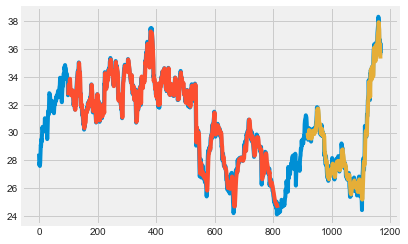

In [296]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(Fox_df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(Fox_df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Fox_df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Fox_df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


#### Red indicates the trained data, blue indicates the FOX stock prices and yellow indicates the tested data. 

In [297]:
len(test_data)

351

In [298]:
x_input=test_data[251:].reshape(1,-1)
x_input.shape

(1, 100)

In [299]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [300]:
temp_input

[0.17816901408450692,
 0.13450704225352106,
 0.15140845070422526,
 0.15915492957746458,
 0.1556338028169011,
 0.16267605633802806,
 0.17535211267605622,
 0.1619718309859155,
 0.18661971830985902,
 0.1330985915492957,
 0.11760563380281686,
 0.1359154929577464,
 0.13380281690140827,
 0.1647887323943662,
 0.15492957746478875,
 0.16549295774647876,
 0.130281690140845,
 0.14295774647887294,
 0.09577464788732382,
 0.09647887323943638,
 0.12042253521126733,
 0.1394366197183099,
 0.14788732394366177,
 0.17394366197183087,
 0.18169014084507018,
 0.19154929577464785,
 0.1330985915492957,
 0.10140845070422522,
 0.09225352112676055,
 0.11126760563380267,
 0.11478873239436616,
 0.11478873239436616,
 0.09366197183098568,
 0.08873239436619706,
 0.07253521126760543,
 0.021830985915492818,
 0.176056338028169,
 0.20563380281690136,
 0.2274647887323944,
 0.28239436619718283,
 0.278169014084507,
 0.26056338028169,
 0.22464788732394347,
 0.2697183098591549,
 0.3154929577464787,
 0.44788732394366204,
 0.407

In [301]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else: 
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8084471]
101
1 day input [0.13450704 0.15140845 0.15915493 0.1556338  0.16267606 0.17535211
 0.16197183 0.18661972 0.13309859 0.11760563 0.13591549 0.13380282
 0.16478873 0.15492958 0.16549296 0.13028169 0.14295775 0.09577465
 0.09647887 0.12042254 0.13943662 0.14788732 0.17394366 0.18169014
 0.1915493  0.13309859 0.10140845 0.09225352 0.11126761 0.11478873
 0.11478873 0.09366197 0.08873239 0.07253521 0.02183099 0.17605634
 0.2056338  0.22746479 0.28239437 0.27816901 0.26056338 0.22464789
 0.26971831 0.31549296 0.44788732 0.40704225 0.42112676 0.40985915
 0.39859155 0.39295775 0.42605634 0.5056338  0.49507042 0.51760563
 0.57676056 0.58873239 0.60422535 0.67957746 0.62323944 0.6443662
 0.66760563 0.57887324 0.71126761 0.71126761 0.73098592 0.72183099
 0.68591549 0.73309859 0.74647887 0.70774648 0.7056338  0.70140845
 0.70422535 0.7915493  0.83169014 0.84859155 0.86126761 0.82605634
 0.84929577 0.78873239 0.82253521 0.86267606 0.82183099 0.87112676
 0.81760563 0.85492958 0.90422535 0

### Prediction for the next 30 days 

In [302]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [303]:
len(Fox_df1)

1169

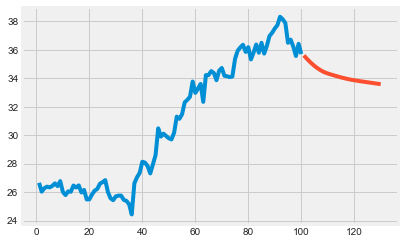

In [304]:
plt.plot(day_new,scaler.inverse_transform(Fox_df1[1069:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

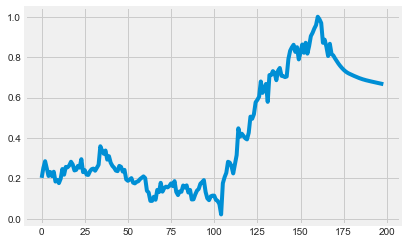

In [305]:
df3 = Fox_df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])